In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

import json
import requests

import numpy as np
import random
#from config import weather_api_key
#from config import g_key
#from citipy import citipy 

import gmaps
import os
series = pd.Series

In [2]:
# Load in file
streaming_file = "MoviesOnStreamingPlatforms_updated.csv"

In [3]:
# Read and display the CSV with Pandas
streaming_file_df = pd.read_csv(streaming_file)
streaming_file_df.head()
#streaming_file_df(16744 rows × 17 columns)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [4]:
#dropna
streaming_file_df1=streaming_file_df.dropna(how='all')
streaming_file_df1.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [5]:
#remove % signs to allow for sorting and binning etc
streaming_file_df1['Rotten Tomatoes'] = streaming_file_df1['Rotten Tomatoes'].str.rstrip('%').astype('float') / 100.0

In [6]:
#remove strings that will prevent binning
streaming_file_df1['Age'] = streaming_file_df1['Age'].str.rstrip('+').astype('str')

In [7]:
streaming_file_df1.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13,8.8,0.87,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18,8.7,0.87,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13,8.5,0.84,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7,8.5,0.96,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18,8.8,0.97,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [8]:
#drop duplicates
streaming_file_df1.drop_duplicates(inplace=True)


In [9]:
#drop rows containing missing values in genres
Streaming_drop_df=streaming_file_df1.dropna(subset=['Genres','Age']) # check; 16469 rows × 17 columns
Streaming_drop_df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13,8.8,0.87,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18,8.7,0.87,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13,8.5,0.84,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7,8.5,0.96,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18,8.8,0.97,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [10]:
df_NetflixGenre=Streaming_drop_df[Streaming_drop_df['Netflix']==1]
len(df_NetflixGenre)

3469

In [11]:
df_NetflixGenre.Genres.mode()

0    Comedy
dtype: object

In [12]:
df_NetflixGenre.to_csv('Netflix.csv')


In [13]:
Netflix_Genre=Streaming_drop_df[Streaming_drop_df['Netflix']==1].groupby('Genres')
Netflix_Genre.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13,8.8,0.87,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18,8.7,0.87,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13,8.5,0.84,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7,8.5,0.96,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18,8.8,0.97,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3515,3515,3516,Rehmataan,2012,nan,NaN,NaN,1,0,0,0,0,Rajveer Singh Maan,"Drama,Family,Romance",India,Punjabi,NaN
3521,3521,3522,Little Baby Bum: Go Buster,2019,nan,NaN,NaN,1,0,0,0,0,"Richard Hickey,Nick Hatton Jones","Animation,Family,Musical",NaN,NaN,NaN
3526,3526,3527,Los Niños Héroes de Chapultepec,2017,nan,NaN,NaN,1,0,0,0,0,Ignacio López Escrivá,"Documentary,History,War",Mexico,Spanish,87.0
3530,3530,3531,Oddbods: The Festive Menace,2017,nan,NaN,NaN,1,0,0,0,0,NaN,"Animation,Comedy,Family",NaN,NaN,NaN


In [14]:
df_NetflixGenre=Streaming_drop_df[Streaming_drop_df['Netflix']==1]
df_NetflixGenre

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13,8.8,0.87,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18,8.7,0.87,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13,8.5,0.84,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7,8.5,0.96,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18,8.8,0.97,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3546,3546,3547,Krish Trish and Baltiboy: Part II,2010,nan,NaN,NaN,1,0,0,0,0,Tilak Shetty,Animation,India,"Hindi,English",65.0
3549,3549,3550,Oddbods: Party Monsters,2018,nan,NaN,NaN,1,1,0,0,0,NaN,Animation,NaN,NaN,NaN
3555,3555,3556,Krish Trish and Baltiboy I,2009,nan,NaN,NaN,1,0,0,0,0,Tilak Shetty,Animation,India,"Hindi,English",65.0
3558,3558,3559,Shikari,1991,nan,NaN,NaN,1,0,0,0,0,"Joydip Mukherjee,Zakir Hossain","Action,Crime,Drama,Romance","Bangladesh,India",Bengali,145.0


In [15]:
df_HuluGenre=Streaming_drop_df[Streaming_drop_df['Hulu']==1]
len(df_HuluGenre)

897

In [16]:
##df_HuluGenre1=Streaming_drop_df[[Streaming_drop_df['Hulu']==1],Streaming_drop_df['Genres']]
#df_HuluGenre1

In [17]:
df_HuluGenre.Genres.count()

897

In [18]:
#Streaming_drop2=df.dropna(subset, inplace=True)
             # .fillna(0)
             # .astype(int) # check; 16469 rows × 17 columns
#Streaming_drop2_df.head()


In [19]:
#keep columns needed for analysis
strm=Streaming_drop_df[['Title','Year','Age','IMDb','Rotten Tomatoes','Netflix','Hulu','Prime Video','Disney+','Directors',
                        'Genres','Country','Runtime']]
strm.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Runtime
0,Inception,2010,13,8.8,0.87,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom",148.0
1,The Matrix,1999,18,8.7,0.87,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,136.0
2,Avengers: Infinity War,2018,13,8.5,0.84,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,149.0
3,Back to the Future,1985,7,8.5,0.96,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,116.0
4,"The Good, the Bad and the Ugly",1966,18,8.8,0.97,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",161.0


In [20]:
#split genres and create new entry for each genre per movie
s=strm['Genres'].str.split(',').apply(series, 1).stack()
s.index=s.index.droplevel(-1)
s.name='Genres'
del strm['Genres']
strm_split_Genres_df=strm.join(s)

In [21]:
strm_split_Genres_df
strm_split_Genres_df.head()


,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Country,Runtime,Genres
0,Inception,2010,13,8.8,0.87,1,0,0,0,Christopher Nolan,"United States,United Kingdom",148.0,Action
0,Inception,2010,13,8.8,0.87,1,0,0,0,Christopher Nolan,"United States,United Kingdom",148.0,Adventure
0,Inception,2010,13,8.8,0.87,1,0,0,0,Christopher Nolan,"United States,United Kingdom",148.0,Sci-Fi
0,Inception,2010,13,8.8,0.87,1,0,0,0,Christopher Nolan,"United States,United Kingdom",148.0,Thriller
1,The Matrix,1999,18,8.7,0.87,1,0,0,0,"Lana Wachowski,Lilly Wachowski",United States,136.0,Action


In [22]:
strm_split_Genres_df.Genres.count()

39098

In [23]:
#calc mean rating for each genre
strm_split_Genres_df.groupby('Genres')['IMDb'].mean()

Genres
Action         5.449831
Adventure      5.615385
Animation      6.252129
Biography      6.808674
Comedy         5.905568
Crime          5.870569
Documentary    6.942612
Drama          6.075494
Family         6.022900
Fantasy        5.685089
Film-Noir      6.332911
Game-Show      6.133333
History        6.731746
Horror         4.724303
Music          6.600000
Musical        6.236683
Mystery        5.646086
News           7.109901
Reality-TV     5.600000
Romance        6.044882
Sci-Fi         4.956168
Short          6.441228
Sport          6.417857
Talk-Show      5.846667
Thriller       5.352066
War            6.250380
Western        5.901420
Name: IMDb, dtype: float64

In [24]:
#Trend in Genre ratings by year
ratings3 = strm_split_Genres_df.groupby(['Year', 'Genres'], as_index=False)['IMDb'].aggregate(np.mean)
ratings3.head()

,Year,Genres,IMDb
0,1902,Action,8.2
1,1902,Adventure,8.2
2,1902,Comedy,8.2
3,1902,Fantasy,8.2
4,1902,Sci-Fi,8.2


<AxesSubplot:xlabel='Year'>

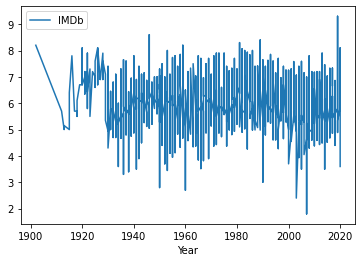

In [25]:
#graph trend by year; too difficult to read (see other sheet for trend by decade)
ratings3.plot.line(x='Year', y='IMDb')

In [26]:
#number of entries after assigning individual genres
df_NetflixGenre=strm_split_Genres_df[strm_split_Genres_df['Netflix']==1]
len(df_NetflixGenre)

8147

In [27]:
#still cleaning-dropna, fill na df_NetflixGenre=df_NetflixGenre.dropna(how='all')
df_NetflixGenre.fillna(0, inplace=True, downcast='infer')
df_NetflixGenre.head()

C:\Users\IRENE\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Country,Runtime,Genres
0,Inception,2010,13,8.8,0.87,1,0,0,0,Christopher Nolan,"United States,United Kingdom",148,Action
0,Inception,2010,13,8.8,0.87,1,0,0,0,Christopher Nolan,"United States,United Kingdom",148,Adventure
0,Inception,2010,13,8.8,0.87,1,0,0,0,Christopher Nolan,"United States,United Kingdom",148,Sci-Fi
0,Inception,2010,13,8.8,0.87,1,0,0,0,Christopher Nolan,"United States,United Kingdom",148,Thriller
1,The Matrix,1999,18,8.7,0.87,1,0,0,0,"Lana Wachowski,Lilly Wachowski",United States,136,Action


In [28]:
#look at netflix
df_NetflixGenre.to_csv('Netflix.csv')

In [29]:
#checking
len(df_NetflixGenre['Genres'])

8147

In [30]:
#checking relevant columns were redistributed during genre split
len(df_NetflixGenre['IMDb'])

8147

In [31]:
#look at Hulu data
df_Hulu=strm_split_Genres_df[strm_split_Genres_df['Hulu']==1]
len(df_Hulu)

2350

In [32]:
#most common genre hulu
df_Hulu.Genres.mode()

0    Drama
dtype: object

In [33]:
df_Hulu.to_csv('Hulu.csv')

In [34]:
#volume of prime 
df_Prime_Video=strm_split_Genres_df[strm_split_Genres_df['Prime Video']==1]
len(df_Prime_Video)

28169

In [35]:
#most common genre prime
df_Prime_Video.Genres.mode()

0    Drama
dtype: object

In [36]:
#volume of disney
df_Disneyp=Streaming_drop_df[Streaming_drop_df['Disney+']==1]
len(df_Disneyp)

564

In [37]:
#most common genre Disneyp
df_Disneyp.Genres.mode()

0    Documentary
dtype: object

In [38]:
#grp by genre and get mean per genre,drop year column for  mean calc, sort descending for most popular (high rating)

genremean=strm_split_Genres_df.groupby(['Genres']).mean()
genremean1=genremean.drop(['Year'],axis=1)
genremean2=genremean1.sort_values(by='IMDb', ascending=False)
genremean2.head()

,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Runtime
Genres,,,,,,,
News,7.109901,0.828387,0.076190,0.047619,0.885714,0.009524,83.919192
Documentary,6.942612,0.838977,0.200707,0.051846,0.744305,0.024745,80.778045
Biography,6.808674,0.742694,0.242387,0.070646,0.693057,0.021924,101.105651
History,6.731746,0.737354,0.184615,0.053147,0.772028,0.022378,100.204513
Music,6.600000,0.730350,0.197901,0.053973,0.730135,0.049475,90.877863


In [39]:
#grp by genre and get mean per genre,drop year column for  mean calc

genremean=strm_split_Genres_df.groupby(['Genres']).mean()
genremean1=genremean.drop(['Year'],axis=1)
genremean3=genremean1.sort_values(by='Rotten Tomatoes', ascending=False)
genremean3.head()

,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Runtime
Genres,,,,,,,
Game-Show,6.133333,0.875000,0.142857,0.142857,0.714286,0.000000,35.000000
Reality-TV,5.600000,0.870000,0.318182,0.090909,0.500000,0.090909,59.000000
Short,6.441228,0.847407,0.256477,0.023316,0.678756,0.059585,23.647222
Documentary,6.942612,0.838977,0.200707,0.051846,0.744305,0.024745,80.778045
News,7.109901,0.828387,0.076190,0.047619,0.885714,0.009524,83.919192


In [40]:
#look at top rated movies by rotten tomato, note multiple categories
strm_split_Genres2=strm_split_Genres_df.drop_duplicates()
strm_split_Genres2_df=pd.DataFrame(strm_split_Genres2)
strm_split_Genres2.nlargest(6,'Rotten Tomatoes', keep='first')

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Country,Runtime,Genres
11,3 Idiots,2009,13,8.4,1.0,1,0,1,0,Rajkumar Hirani,India,170.0,Comedy
11,3 Idiots,2009,13,8.4,1.0,1,0,1,0,Rajkumar Hirani,India,170.0,Drama
89,The Dawn Wall,2018,nan,8.1,1.0,1,0,0,0,"Josh Lowell,Peter Mortimer","Austria,United States",100.0,Documentary
89,The Dawn Wall,2018,nan,8.1,1.0,1,0,0,0,"Josh Lowell,Peter Mortimer","Austria,United States",100.0,Biography
89,The Dawn Wall,2018,nan,8.1,1.0,1,0,0,0,"Josh Lowell,Peter Mortimer","Austria,United States",100.0,Sport
126,Bad Genius,2017,13,7.6,1.0,1,0,0,0,Nattawut Poonpiriya,Thailand,130.0,Comedy


In [41]:
#top rated movies/genres by IMDb
strm_split_Genres2=strm_split_Genres_df.drop_duplicates()
strm_split_Genres2.nlargest(6,'IMDb', keep='first')

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Country,Runtime,Genres
1292,My Next Guest with David Letterman and Shah Ru...,2019,nan,9.3,NaN,1,0,0,0,NaN,NaN,61.0,Talk-Show
5110,Love on a Leash,2011,nan,9.3,NaN,0,0,1,0,Fen Tian,United States,90.0,Comedy
5110,Love on a Leash,2011,nan,9.3,NaN,0,0,1,0,Fen Tian,United States,90.0,Drama
5110,Love on a Leash,2011,nan,9.3,NaN,0,0,1,0,Fen Tian,United States,90.0,Fantasy
5110,Love on a Leash,2011,nan,9.3,NaN,0,0,1,0,Fen Tian,United States,90.0,Romance
6566,Square One,2019,nan,9.3,NaN,0,0,1,0,Danny Wu,United States,83.0,Documentary


In [42]:
#looking at unique Genre list
strm_split_Genres_df.Genres.unique()

array(['Action', 'Adventure', 'Sci-Fi', 'Thriller', 'Comedy', 'Western',
       'Animation', 'Family', 'Biography', 'Drama', 'Music', 'War',
       'Crime', 'Fantasy', 'Romance', 'History', 'Mystery', 'Horror',
       'Sport', 'Documentary', 'Musical', 'News', 'Short', 'Reality-TV',
       'Talk-Show', 'Game-Show', 'Film-Noir'], dtype=object)

In [43]:
#number of shows in each Genre
Genrecount_df=pd.DataFrame({'count' : strm_split_Genres2.groupby( [ "Genres"] ).size()}).reset_index()
Genrecount_df.sort_values(by='count',ascending=False)
Genrecount_df.head(12)
    
    

,Genres,count
0,Action,2683
1,Adventure,1778
2,Animation,711
3,Biography,821
4,Comedy,4637
5,Crime,1833
6,Documentary,2546
7,Drama,7227
8,Family,1514
9,Fantasy,1089


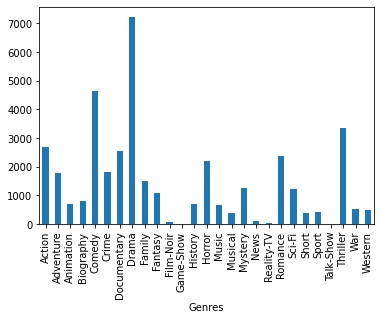

In [44]:
#Visual of Genre by volume
import pandas as pd
import matplotlib.pyplot as plt
Genrecount_df.plot(x='Genres', y='count', kind='bar', legend=False)
plt.show()

Text(0, 0.5, 'Title Count')

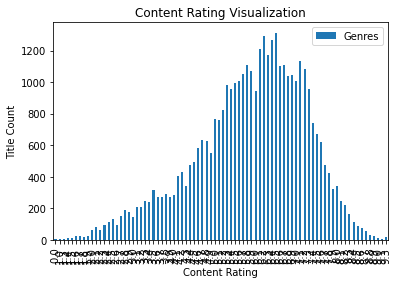

In [45]:
# use a visualization to display that overall data rating by genre for all platforms, including a title and x and y labels
strm_data=strm_split_Genres_df[['IMDb','Genres']].groupby('IMDb').count().plot(kind='bar', title='Content Rating Visualization')
plt.xlabel('Content Rating')
plt.ylabel('Title Count')

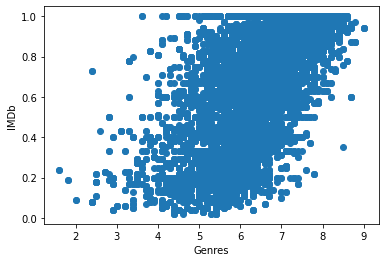

In [46]:
#correlation bet mean IMDB and Rotten Tomatoes by Genre for all data and platforms
strm_split_Genres_df.fillna('Not Mentioned')
plt.scatter(strm_split_Genres_df.iloc[:,3],strm_split_Genres_df.iloc[:,4])
plt.xlabel('Genres')
plt.ylabel('IMDb')
plt.show()


In [47]:
 # determine the top rated movie (by imdb star rating) for each genre
strm_split_Genres_df.sort_values('IMDb', ascending=False).groupby('Genres')['Title'].first()

Genres
Action                                           The Dark Knight
Adventure                                                 Bounty
Animation                                           Memories 677
Biography                                      A Dog Named Gucci
Comedy                                           Love on a Leash
Crime                                            The Dark Knight
Documentary                                   Down, But Not Out!
Drama                                                 Square One
Family                                            Finding Family
Fantasy                                          Love on a Leash
Film-Noir                                       Sunset Boulevard
Game-Show                                    5 Seconds of Summer
History                                                   Bounty
Horror                                              Memories 677
Music                                                 Square One
Musical           

In [48]:
# determine the top rated movie (by RT star rating) for each genre
strm_split_Genres_df.sort_values('Rotten Tomatoes', ascending=False).groupby('Genres')['Title'].first()

Genres
Action                              A Trip to the Moon
Adventure                                 Captain Kidd
Animation                     Mickey's Christmas Carol
Biography                                 Captain Kidd
Comedy                       The Distinguished Citizen
Crime                          Abducted in Plain Sight
Documentary    To Hell and Back: The Kane Hodder Story
Drama                        The Distinguished Citizen
Family                                    Mary Poppins
Fantasy                                   Mary Poppins
Film-Noir                                     Gaslight
Game-Show                                  Double Dare
History                                   Captain Kidd
Horror               Nightmares in Red, White and Blue
Music                           Sun Ra: A Joyful Noise
Musical                                   Mary Poppins
Mystery                                       Gaslight
News                             Life According to Sam
Rea

In [49]:
# Rough look at age bins by genre to see if any trends or major difference-most genres include either all ages or 'all'
strm_split_Genres_df.groupby('Genres')['Age'].unique()


Genres
Action         [13, 18, 7, nan, all, 16]
Adventure      [13, 7, 18, all, 16, nan]
Animation      [7, nan, all, 13, 18, 16]
Biography      [18, 13, 7, nan, 16, all]
Comedy         [7, 13, 18, all, nan, 16]
Crime          [18, 13, nan, 16, 7, all]
Documentary    [13, 18, nan, 7, 16, all]
Drama          [18, 13, 7, nan, all, 16]
Family         [7, all, nan, 13, 18, 16]
Fantasy        [18, 7, 13, all, nan, 16]
Film-Noir              [nan, all, 7, 18]
Game-Show                          [nan]
History        [18, 7, 13, 16, nan, all]
Horror         [nan, 18, 13, 7, 16, all]
Music          [18, 13, nan, 16, 7, all]
Musical        [all, 7, 18, 13, nan, 16]
Mystery        [18, 13, 7, nan, all, 16]
News           [13, 18, nan, 7, all, 16]
Reality-TV          [nan, 16, 13, 18, 7]
Romance        [7, 18, 13, nan, all, 16]
Sci-Fi         [13, 18, 7, nan, 16, all]
Short          [16, nan, 18, 13, all, 7]
Sport          [7, 13, nan, 18, 16, all]
Talk-Show               [nan, 7, 18, 13]
Thriller 

In [50]:
#top rated genres IMDb sorted
Genre_rate_df=pd.DataFrame({'Age':strm_split_Genres_df['Age'],'Genres':strm_split_Genres_df['Genres'],'Netflix':strm_split_Genres_df['Netflix'],
                         'Hulu':strm_split_Genres_df['Hulu'],'IMDb':strm_split_Genres_df['IMDb'],'Title':strm_split_Genres_df['Title']})
Genre_rate_df.head()

,Age,Genres,Netflix,Hulu,IMDb,Title
0,13,Action,1,0,8.8,Inception
0,13,Adventure,1,0,8.8,Inception
0,13,Sci-Fi,1,0,8.8,Inception
0,13,Thriller,1,0,8.8,Inception
1,18,Action,1,0,8.7,The Matrix


In [51]:
#Rating by Genre Hulu
genre_ratingH = Genre_rate_df[Genre_rate_df["Hulu"]==1].groupby('Genres')['IMDb'].mean().sort_values(ascending=False)
genre_ratingH

Genres
News           7.480000
Documentary    6.879389
Biography      6.842105
History        6.718421
Music          6.713889
Talk-Show      6.600000
Sport          6.544444
War            6.524000
Western        6.404000
Reality-TV     6.400000
Film-Noir      6.400000
Animation      6.357534
Drama          6.266590
Adventure      6.253211
Crime          6.211000
Game-Show      6.200000
Romance        6.198675
Short          6.142857
Fantasy        6.116883
Musical        6.086667
Comedy         6.054815
Mystery        6.022353
Action         6.014729
Thriller       5.886758
Sci-Fi         5.859302
Family         5.769231
Horror         5.528455
Name: IMDb, dtype: float64

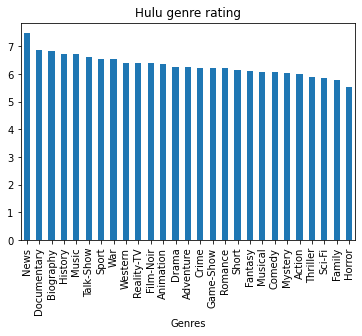

In [52]:
#ratings for Hulu content grouped by genre
genre_ratingH.plot(x='Genres', y='count', kind='bar', legend=False)
plt.title('Hulu genre rating')
plt.show()

In [53]:
#Rating by Genre Netflix
genre_ratingN = Genre_rate_df[Genre_rate_df["Netflix"]==1].groupby('Genres')['IMDb'].mean().sort_values(ascending=False)
genre_ratingN

Genres
News           7.100000
Biography      6.973096
Documentary    6.925352
History        6.780769
Music          6.743307
Sport          6.562037
War            6.540698
Western        6.532000
Drama          6.350439
Short          6.348421
Animation      6.336967
Musical        6.328378
Crime          6.195946
Romance        6.186972
Comedy         6.165555
Talk-Show      6.125000
Mystery        6.112195
Fantasy        6.110630
Film-Noir      6.100000
Adventure      6.086751
Family         6.078641
Action         6.031308
Sci-Fi         5.937824
Thriller       5.933851
Reality-TV     5.814286
Horror         5.535985
Game-Show      5.100000
Name: IMDb, dtype: float64

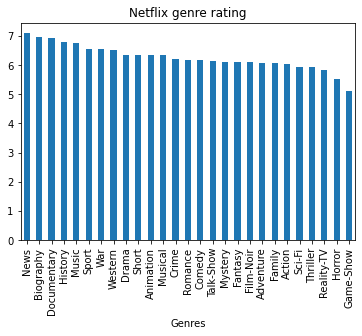

In [54]:
genre_ratingN.plot(x='Genres', y='count', kind='bar', legend=False)
plt.title('Netflix genre rating')
plt.show()

In [55]:
#dtype=Genre_rate_df['IMDb']
#Genre by imdb Ratings sorted
stream_stats = Genre_rate_df.groupby('Genres').agg({'IMDb': [np.size, np.mean]}).sort_values([('IMDb', 'mean')], ascending=False)
print(stream_stats)

               IMDb          
               size      mean
Genres                       
News          105.0  7.109901
Documentary  2546.0  6.942612
Biography     821.0  6.808674
History       715.0  6.731746
Music         667.0  6.600000
Short         386.0  6.441228
Sport         404.0  6.417857
Film-Noir      79.0  6.332911
Animation     711.0  6.252129
War           539.0  6.250380
Musical       401.0  6.236683
Game-Show       7.0  6.133333
Drama        7227.0  6.075494
Romance      2359.0  6.044882
Family       1514.0  6.022900
Comedy       4637.0  5.905568
Western       499.0  5.901420
Crime        1833.0  5.870569
Talk-Show      19.0  5.846667
Fantasy      1089.0  5.685089
Mystery      1274.0  5.646086
Adventure    1778.0  5.615385
Reality-TV     22.0  5.600000
Action       2683.0  5.449831
Thriller     3354.0  5.352066
Sci-Fi       1228.0  4.956168
Horror       2201.0  4.724303


In [56]:
#create vehicle for platforms
platform_num = Genre_rate_df.iloc[:,2:4].sum()
platform_list = platform_num.index
platform_list

Index(['Netflix', 'Hulu'], dtype='object')

In [57]:
#adding this down for convenience
strm_split_Genres_df.head(1)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Country,Runtime,Genres
0,Inception,2010,13,8.8,0.87,1,0,0,0,Christopher Nolan,"United States,United Kingdom",148.0,Action


In [58]:
#netflix sorted by imdb
df = pd.read_csv('Netflix.csv')
df['Platforms'] =''
for platform in platform_list:  
    df['Platforms'].loc[df[platform]==1] = platform
score_df = df[['IMDb','Platforms']].dropna(how='any')
score_df['IMDb'] = score_df['IMDb']
score_df

C:\Users\IRENE\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,IMDb,Platforms
0,8.8,Netflix
1,8.8,Netflix
2,8.8,Netflix
3,8.8,Netflix
4,8.7,Netflix
...,...,...
8142,0.0,Netflix
8143,0.0,Netflix
8144,0.0,Netflix
8145,0.0,Netflix


In [59]:
#hulu sorted by IMDb
df = pd.read_csv('Hulu.csv')
df['Platforms'] =''
for platform in platform_list:  
    df['Platforms'].loc[df[platform]==1] = platform
score_df = df[['IMDb','Platforms']].dropna(how='any')
score_df['IMDb'] = score_df['IMDb']
score_df.head()

C:\Users\IRENE\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,IMDb,Platforms
0,8.1,Hulu
1,8.1,Hulu
2,7.9,Hulu
3,7.2,Hulu
4,7.2,Hulu


The average IMDb score in Hulu is 6.01
The average IMDb score in Netflix is 6.03
p value =0.8874


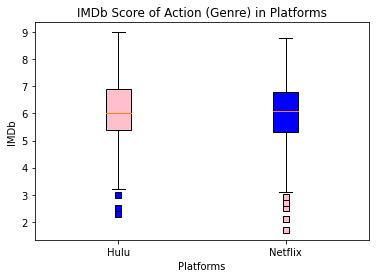

The average IMDb score in Hulu is 6.25
The average IMDb score in Netflix is 6.09
p value =0.18758


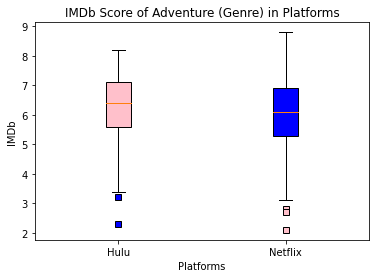

The average IMDb score in Hulu is 5.86
The average IMDb score in Netflix is 5.94
p value =0.58028


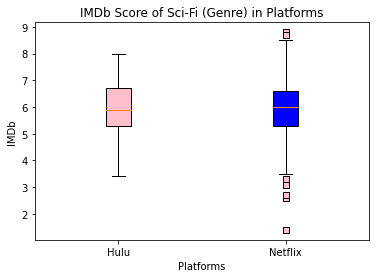

The average IMDb score in Hulu is 5.89
The average IMDb score in Netflix is 5.93
p value =0.57979


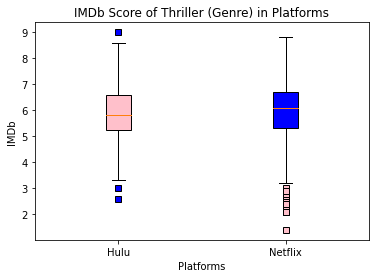

The average IMDb score in Hulu is 6.05
The average IMDb score in Netflix is 6.17
p value =0.10545


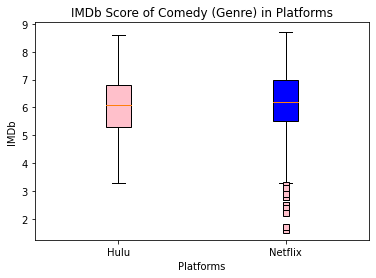

The average IMDb score in Hulu is 6.4
The average IMDb score in Netflix is 6.53
p value =0.70531


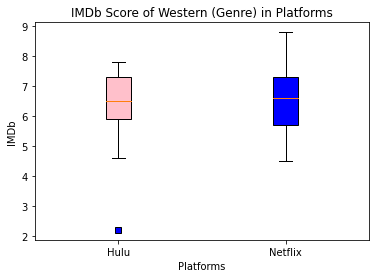

The average IMDb score in Hulu is 6.36
The average IMDb score in Netflix is 6.34
p value =0.88653


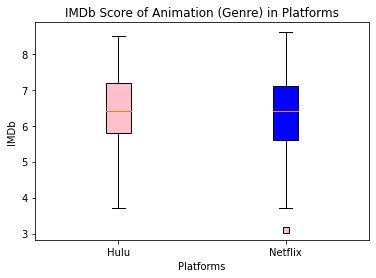

The average IMDb score in Hulu is 5.77
The average IMDb score in Netflix is 6.08
p value =0.01494


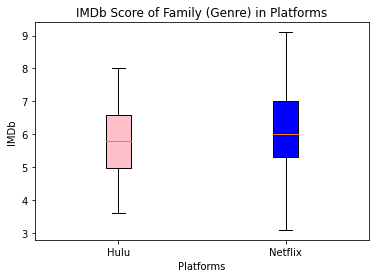

The average IMDb score in Hulu is 6.84
The average IMDb score in Netflix is 6.97
p value =0.32578


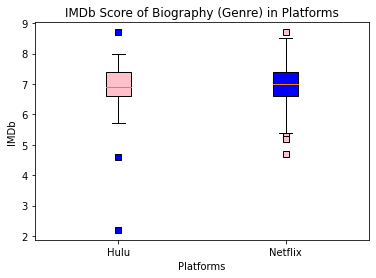

The average IMDb score in Hulu is 6.27
The average IMDb score in Netflix is 6.35
p value =0.13179


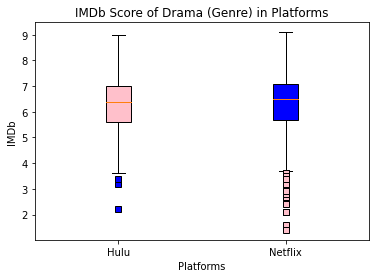

The average IMDb score in Hulu is 6.53
The average IMDb score in Netflix is 6.59
p value =0.70349


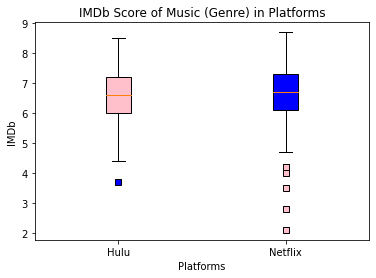

The average IMDb score in Hulu is 6.52
The average IMDb score in Netflix is 6.54
p value =0.94405


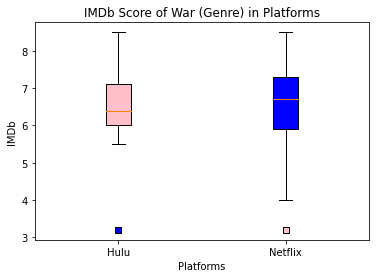

The average IMDb score in Hulu is 6.21
The average IMDb score in Netflix is 6.2
p value =0.90163


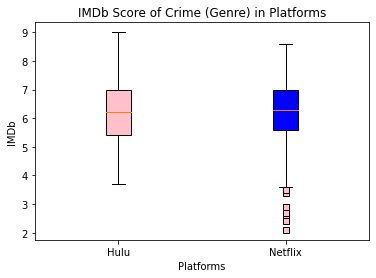

The average IMDb score in Hulu is 6.12
The average IMDb score in Netflix is 6.11
p value =0.96714


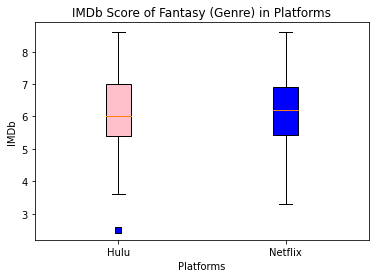

The average IMDb score in Hulu is 6.2
The average IMDb score in Netflix is 6.19
p value =0.88819


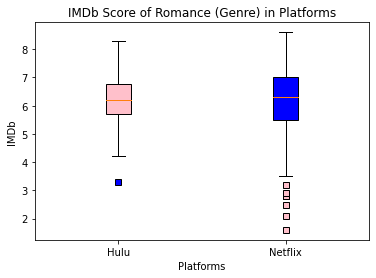

The average IMDb score in Hulu is 6.72
The average IMDb score in Netflix is 6.78
p value =0.72495


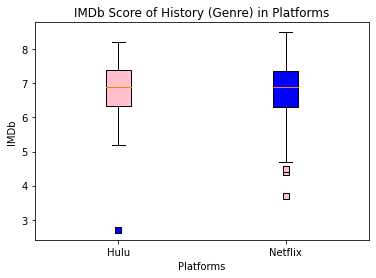

The average IMDb score in Hulu is 6.02
The average IMDb score in Netflix is 6.11
p value =0.45883


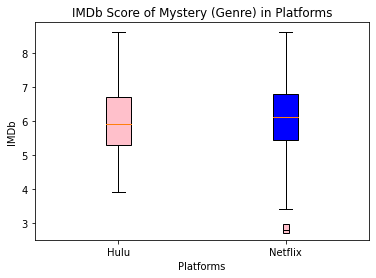

The average IMDb score in Hulu is 5.53
The average IMDb score in Netflix is 5.54
p value =0.94943


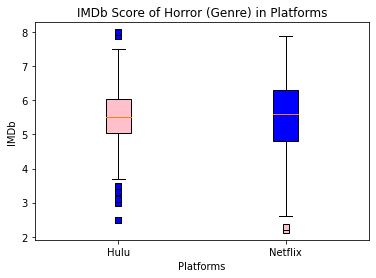

The average IMDb score in Hulu is 6.54
The average IMDb score in Netflix is 6.56
p value =0.93052


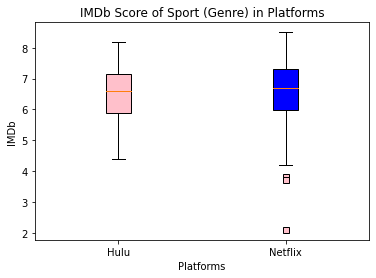

The average IMDb score in Hulu is 6.88
The average IMDb score in Netflix is 6.93
p value =0.67484


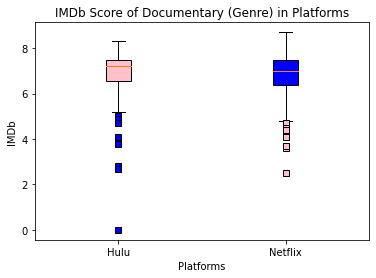

The average IMDb score in Hulu is 6.09
The average IMDb score in Netflix is 6.33
p value =0.52559


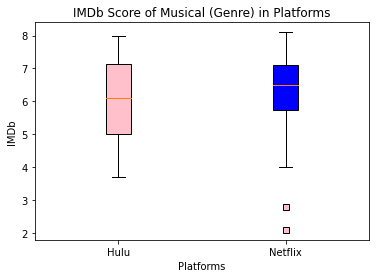

The average IMDb score in Hulu is 7.48
The average IMDb score in Netflix is 7.1
p value =0.3957


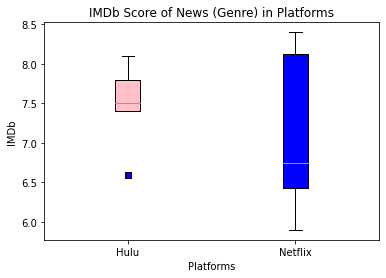

The average IMDb score in Hulu is 6.14
The average IMDb score in Netflix is 6.35
p value =0.64352


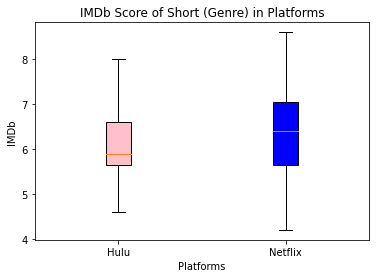

The average IMDb score in Hulu is 6.4
The average IMDb score in Netflix is 5.81
p value =0.35824


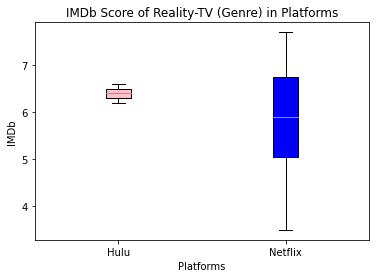

The average IMDb score in Hulu is 6.6
The average IMDb score in Netflix is 6.12
p value =nan


C:\Users\IRENE\anaconda3\envs\PythonData\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\IRENE\anaconda3\envs\PythonData\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\IRENE\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


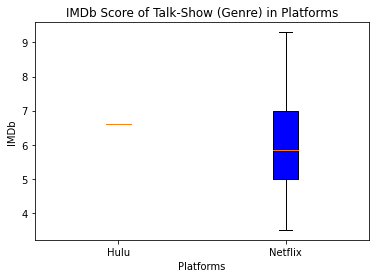

The average IMDb score in Hulu is 6.2
The average IMDb score in Netflix is 5.1
p value =nan


C:\Users\IRENE\anaconda3\envs\PythonData\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\IRENE\anaconda3\envs\PythonData\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\IRENE\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


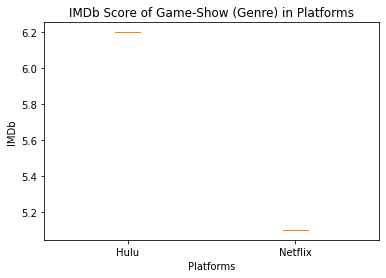

The average IMDb score in Hulu is 6.4
The average IMDb score in Netflix is 6.1
p value =nan


C:\Users\IRENE\anaconda3\envs\PythonData\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\IRENE\anaconda3\envs\PythonData\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\IRENE\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


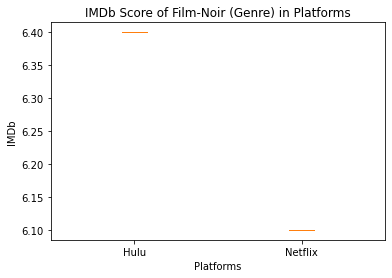

<Figure size 432x288 with 0 Axes>

In [60]:
#Analyze Genres by rating-boxplots
Series = pd.Series
Genre_rate_df = Genre_rate_df.dropna(how='any')
Genres_list = Genre_rate_df['Genres'].str.split(',').apply(series, 1).stack().unique()
for Genre in Genres_list:
    colors = ['pink','blue']
    IMDb_list = []
    platform_list=['Hulu','Netflix']
    t_test = []
    i=0
    for platform in platform_list:
        filt = (Genre_rate_df[platform]==1)&(Genre_rate_df['Genres'].str.contains(Genre))
        IMDb_list = list(Genre_rate_df['IMDb'].loc[filt])
        ave_IMDb = round(Genre_rate_df['IMDb'].loc[filt].mean(),2)
        print(f'The average IMDb score in {platform} is {ave_IMDb}')
        t_test.append(IMDb_list)
        plt.boxplot(IMDb_list,positions = [i],flierprops=dict(markerfacecolor=colors[i-1], marker='s'),boxprops=dict(facecolor=colors[i]), patch_artist=True)
        i = i+1
    p_value = round(st.ttest_ind(t_test[0], t_test[1], equal_var=False)[1],5)
    print(f'p value ={p_value}')
    x_axis = np.arange(len(platform_list))
    tick_locations = [value for value in x_axis]
    plt.xticks(tick_locations, platform_list)
    plt.xlabel('Platforms')
    plt.ylabel('IMDb')
    plt.title(f'IMDb Score of {Genre} (Genre) in Platforms')
    plt.show()
    plt.savefig('Boxplots of each Genre by ave rating and by platform')